In [5]:
from bs4 import BeautifulSoup
import urllib, re, time, multiprocessing

def scraping_xineurope(startId, endId):
    tempId = startId
    key_list = []
    while tempId <= endId:
        try:
            html = urllib.request.urlopen('http://www.xineurope.com/search.php?mod=forum&searchid=' + str(tempId) + '&orderby=lastpost&ascdesc=desc&searchsubmit=yes&kw=').read()
            soup = BeautifulSoup(html, "lxml")
            keys = soup.find_all('span', {'class': 'emfont'})
        except:
            print('Error happened when scraping search id ' + str(tempId))
            break
        for j in keys:
            keyWord = j.get_text()
            if keyWord:
                key_list.append(keyWord)
                print(str(tempId), keyWord)
            else:
                print('End of search id')
                tempId = endId
        tempId += 1
    print('Scraping from search id ' + str(startId) + ' to search id ' + str(tempId - 1) + ' finished')
    return key_list

key_list = scraping_xineurope(1,50)

1 campus langue
2 里昂 法语
3 lafayette
4 民宿
5 打工
6 峡湾
7 互惠生
8 斯堡
9 互惠生
10 水饺
11 巴黎 民宿
12 打工 拉面
13 16
14 饺子
15 商校认证
16 visiteur转家庭居留
17 换红包
18 rcpc过期
19 巴黎中央理工
20 斯特拉斯堡
22 火锅
23 转家庭居留
24 接机
25 马赛 中餐
26 DIY
27 Cles
28 Cles
29 学法语
30 合作意向书
31 图尔
32 巴黎学法语
33 巴黎法语
34 租房
35 二手车过户
36 租房
37 银行卡上限
38 订机票
39 停机
40 香烟
41 lettre de presentation de projet
42 projet professionnel
43 职业规划书模板
45 职业规划书
46 桌椅
47 项目计划书
48 里昂高商
49 代购 国内
50 siege auto
Scraping from search id 1 to search id 50 finished


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\changyi\AppData\Local\Temp\jieba.cache
Loading model cost 0.828 seconds.
Prefix dict has been built succesfully.


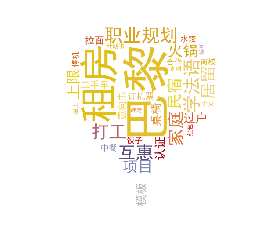

In [6]:
#encoding=gbk #中文编码

import jieba.analyse
from PIL import Image,ImageSequence
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

lyric= ''
for i in key_list:
    lyric += str(i)
    
#这里是使用jieba进行分词，会挑选出频率最高的词(默认前20个)
result=jieba.analyse.textrank(lyric,topK=50,withWeight=True)
keywords = dict()
for i in result:
    keywords[i[0]]=i[1]
#print(keywords)

#这里的img是你要使用的图片模板，形状颜色什么的就靠它啦
image= Image.open('./obj.png')
graph = np.array(image)
wc = WordCloud(font_path='./fonts/simhei.ttf',background_color='White',max_words=50,mask=graph)
wc.generate_from_frequencies(keywords)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis("off")
plt.show()
wc.to_file('res.png')

In [7]:
thefile = open('xineuropeResult.txt', 'w')
for i in key_list: 
    thefile.write("%s\n" % str(i))

In [8]:
# totalId = 100

# scrapy1 = multiprocessing.Process(target = scraping_xineurope, args = (1, 25), name = 'scrapy1')
# scrapy2 = multiprocessing.Process(target = scraping_xineurope, args = (26, 50), name = 'scrapy2')
# scrapy3 = multiprocessing.Process(target = scraping_xineurope, args = (51, 75), name = 'scrapy3')
# scrapy4 = multiprocessing.Process(target = scraping_xineurope, args = (76, 100), name = 'scrapy4')

# scrapy1.start()
# scrapy2.start()
# scrapy3.start()
# scrapy4.start()

# scrapy1.join()
# scrapy2.join()
# scrapy3.join()
# scrapy4.join()